<a href="https://colab.research.google.com/github/seunghee-lee/option/blob/main/stochastics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic Process

## Stochastic

In [1]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

## Random Numbers

In [3]:
npr.seed(100)
np.set_printoptions(precision=4)

In [4]:
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [5]:
npr.rand(5, 5)

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [6]:
a = 5.
b = 10.
npr.rand(10) * (b - a) + a

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [7]:
npr.rand(5, 5) * (b - a) + a

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

In [8]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)
rn2 = npr.randint(0, 10, sample_size)
rn3 = npr.sample(size=sample_size)
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)

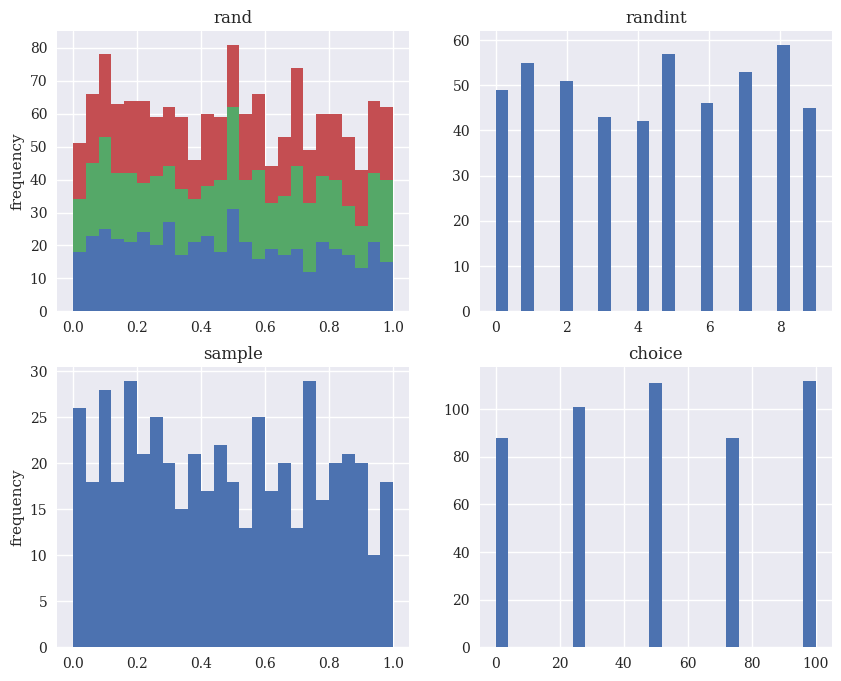

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice');

In [10]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df=3, size=sample_size)
rn4 = npr.poisson(lam=1.0, size=sample_size)

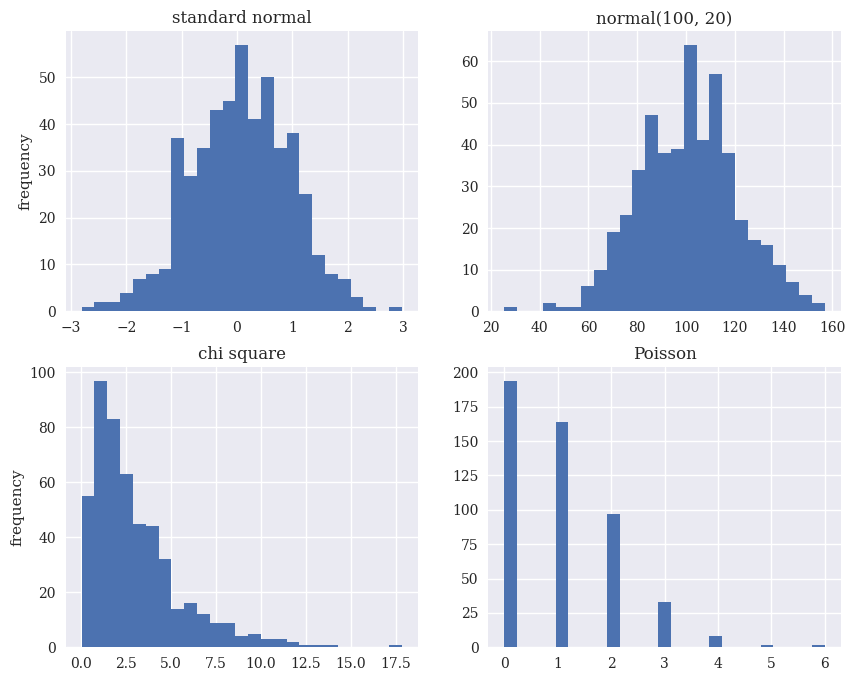

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson');

## Simulation

### Random Variables

In [12]:
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
        sigma * math.sqrt(T) * npr.standard_normal(I))

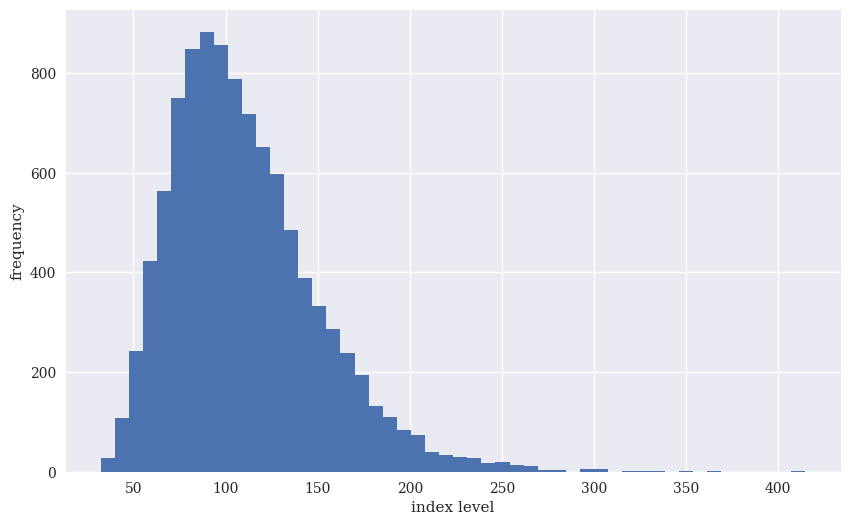

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [14]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                        sigma * math.sqrt(T), size=I)

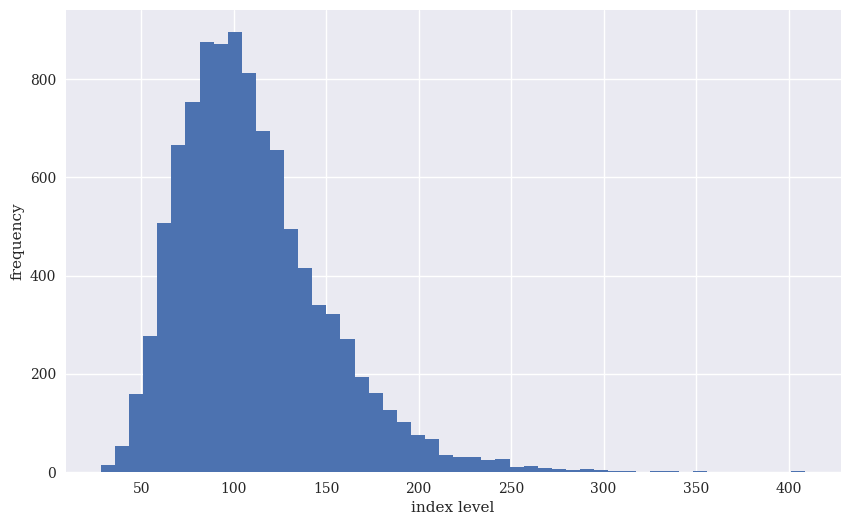

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [16]:
import scipy.stats as scs

In [17]:
def print_statistics(a1, a2):
    ''' Prints selected statistics.

    Parameters
    ==========
    a1, a2: ndarray objects
        results objects from simulation
    '''
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' %
        ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

In [18]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         32.327         28.230
           max        414.825        409.110
          mean        110.661        110.452
           std         40.192         39.838
          skew          1.096          1.113
      kurtosis          2.233          2.218


### Stochastic Processes

#### Geometric Brownian Motion

In [19]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
            sigma * math.sqrt(dt) * npr.standard_normal(I))

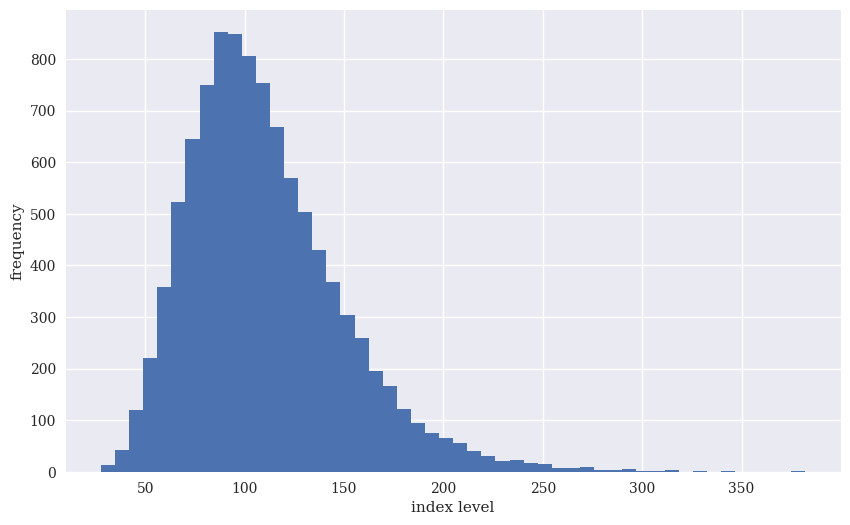

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [21]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.746         28.230
           max        382.096        409.110
          mean        110.416        110.452
           std         39.182         39.838
          skew          1.070          1.113
      kurtosis          2.026          2.218


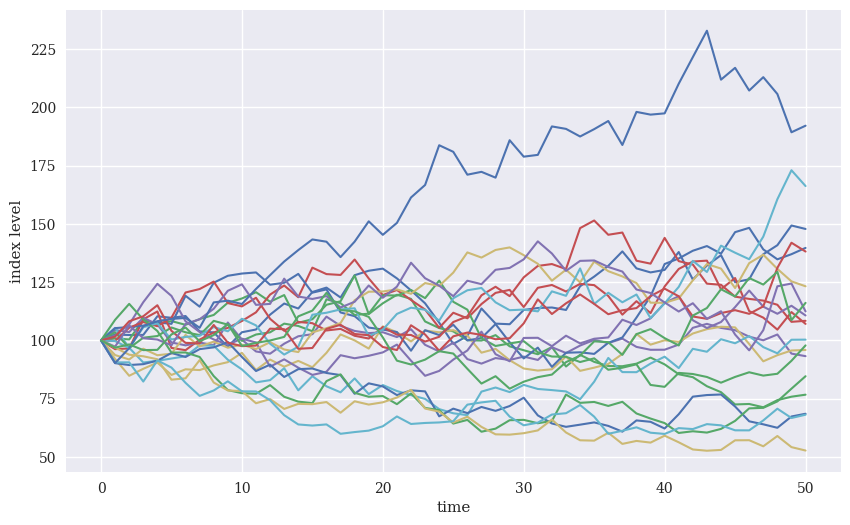

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :20], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

### 블랙-숄즈모형

In [23]:
import numpy as np
import scipy.stats as stat

def BSM(S, X, T, r, vol, option):
  d1 = (np.log(S/X) + (r+(1/2*vol)**2)*T)/vol*np.sqrt(T)
  d2 = d1 - vol*np.sqrt(T)

  if option == 'call':
    BSM_price = S*stat.norm.cdf(d1) - X*np.exp(-r*T)*stat.norm.cdf(d2)
  else :
    BSM_price = -S*stat.norm.cdf(-d1) + X*np.exp(-r*T)*stat.norm.cdf(-d2)
  return(BSM_price)

In [24]:
BSM(100, 100, 0.5, 0.035, 0.2, 'call')

np.float64(6.461573471608148)

In [25]:
BSM(100, 100, 0.5, 0.035, 0.2, 'put')

np.float64(4.726797038115457)

In [26]:
# vega를 계산하는 함수
def vega(S, X, r, vol, T):
  d1 = (np.log(S/X) + (r+(1/2*vol)**2)*(T))/vol*np.sqrt(T)
  vega = S*np.sqrt(T)*stat.norm.cdf(d1)
  return(vega)

In [27]:
def implied_vol(S, X, r, T, market_price, option):
  max_iter = 300
  vol_old = 0.2   #initial value

  for i in range(max_iter):
    BSM_price = BSM(S=S, X=X, T=T, r=r, vol=vol_old, option=option)
    vega_value = vega(S=S, X=X, r=r, vol=vol_old, T=T)
    vol_new = vol_old - (BSM_price- market_price)/vega_value
    epsilon = abs(vol_new-vol_old)

    if epsilon < 0.00000001:
      break
    vol_old = vol_new

  implied_vol = vol_old
  return(implied_vol)

In [28]:
S, X, T, r = 100, 100, 0.5, 0.035
market_price = 7.5
implied_vol_est = implied_vol(S, X, r, T, market_price, 'call')
print("Implied Volatility is : ", implied_vol_est)

Implied Volatility is :  0.23774222208475462


#### Square-Root Diffusion

In [29]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1
I = 10000
M = 50
dt = T / M

In [30]:
def srd_euler():
    xh = np.zeros((M + 1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1] +
                 kappa * (theta - np.maximum(xh[t - 1], 0)) * dt +
                 sigma * np.sqrt(np.maximum(xh[t - 1], 0)) *
                 math.sqrt(dt) * npr.standard_normal(I))
    x = np.maximum(xh, 0)
    return x
x1 = srd_euler()

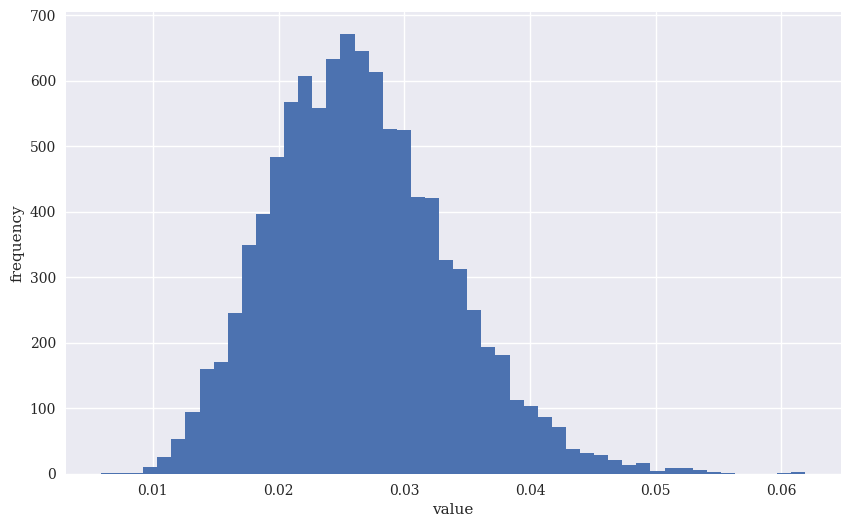

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

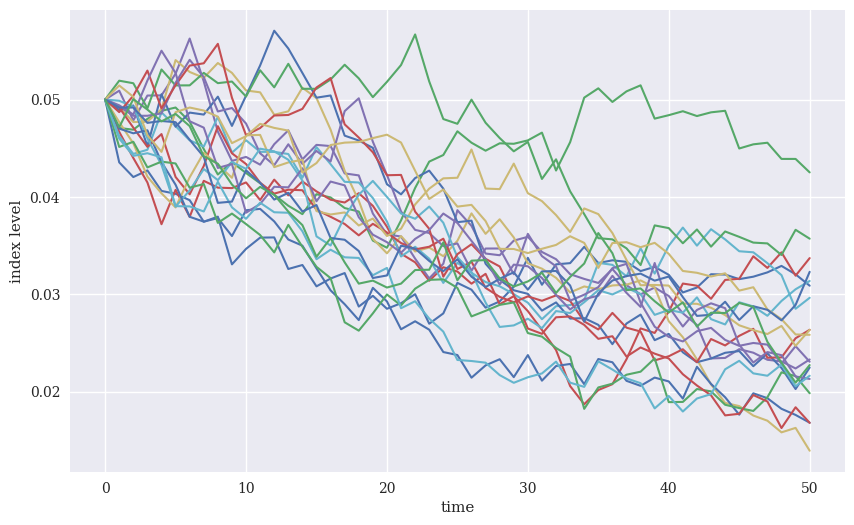

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :20], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

In [33]:
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x[t - 1]
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    return x
x2 = srd_exact()

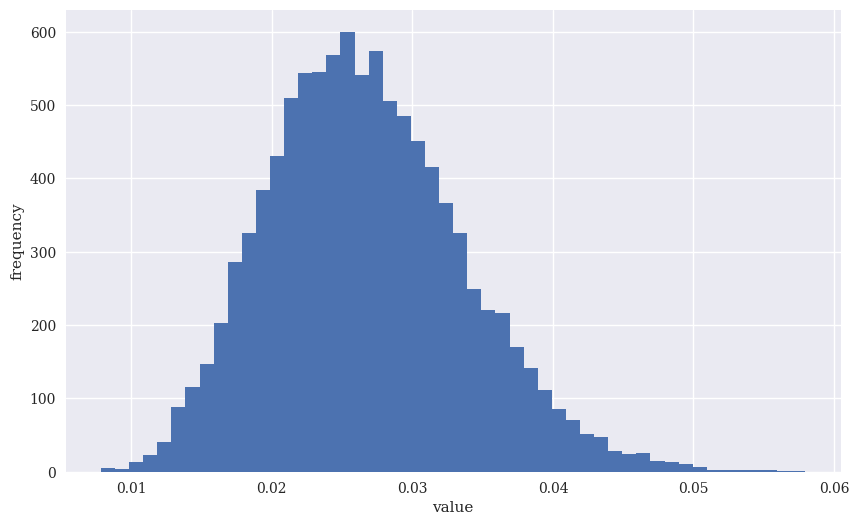

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

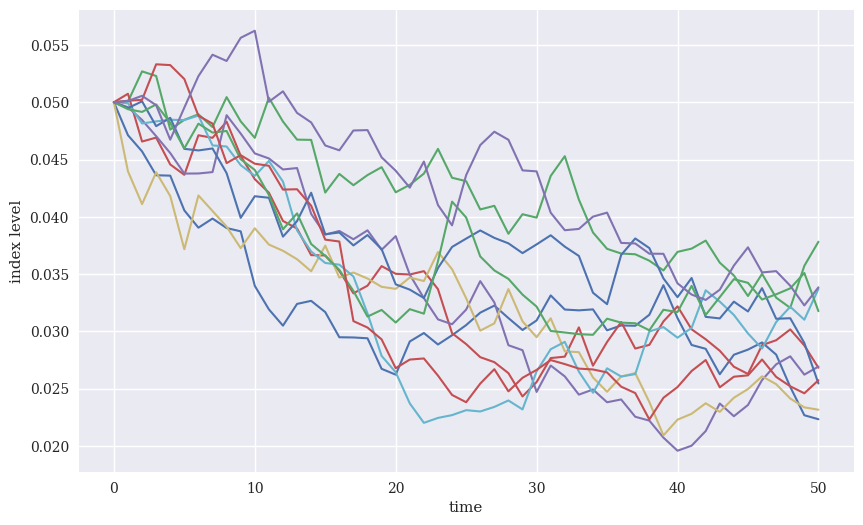

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

In [36]:
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.006          0.008
           max          0.062          0.058
          mean          0.027          0.027
           std          0.007          0.007
          skew          0.476          0.439
      kurtosis          0.355          0.203


In [37]:
I = 250000
%time x1 = srd_euler()

CPU times: user 641 ms, sys: 295 ms, total: 936 ms
Wall time: 980 ms


In [38]:
%time x2 = srd_exact()

CPU times: user 1.37 s, sys: 95.2 ms, total: 1.47 s
Wall time: 1.46 s


In [39]:
print_statistics(x1[-1], x2[-1])
x1 = 0.0; x2 = 0.0

     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.004          0.006
           max          0.067          0.070
          mean          0.027          0.027
           std          0.007          0.007
          skew          0.479          0.492
      kurtosis          0.313          0.379


#### Stochastic Volatility

In [40]:
S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

In [41]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)

In [42]:
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [43]:
M = 50
I = 10000
ran_num = npr.standard_normal((2, M + 1, I))

In [44]:
dt = T / M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] +
             kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +
             sigma * np.sqrt(np.maximum(vh[t - 1], 0)) *
             math.sqrt(dt) * ran[1])
v = np.maximum(vh, 0)

In [45]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                    np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

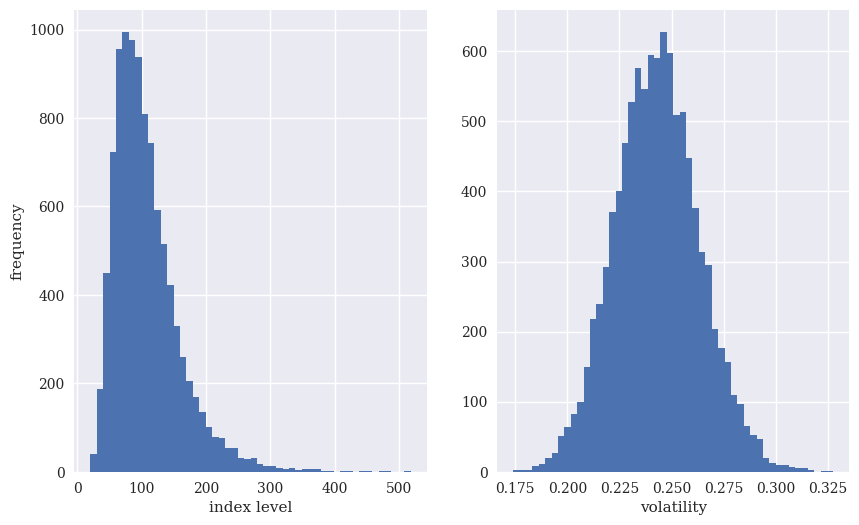

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility');

In [47]:
print_statistics(S[-1], v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         20.556          0.174
           max        517.798          0.328
          mean        107.820          0.243
           std         51.316          0.020
          skew          1.578          0.124
      kurtosis          4.316          0.048


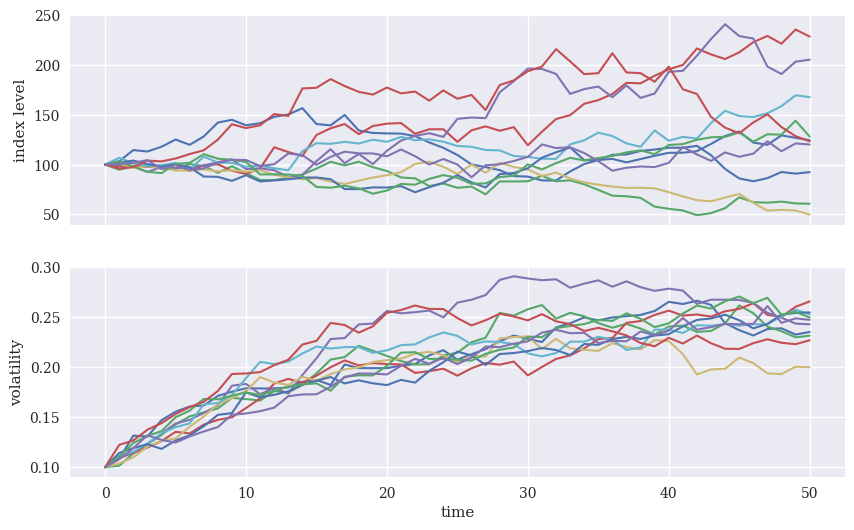

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                               figsize=(10, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility');

#### Jump-Diffusion

In [49]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0

In [50]:
M = 50
I = 10000
dt = T / M
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)

In [51]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt +
                       sigma * math.sqrt(dt) * sn1[t]) +
                       (np.exp(mu + delta * sn2[t]) - 1) *
                       poi[t])
    S[t] = np.maximum(S[t], 0)

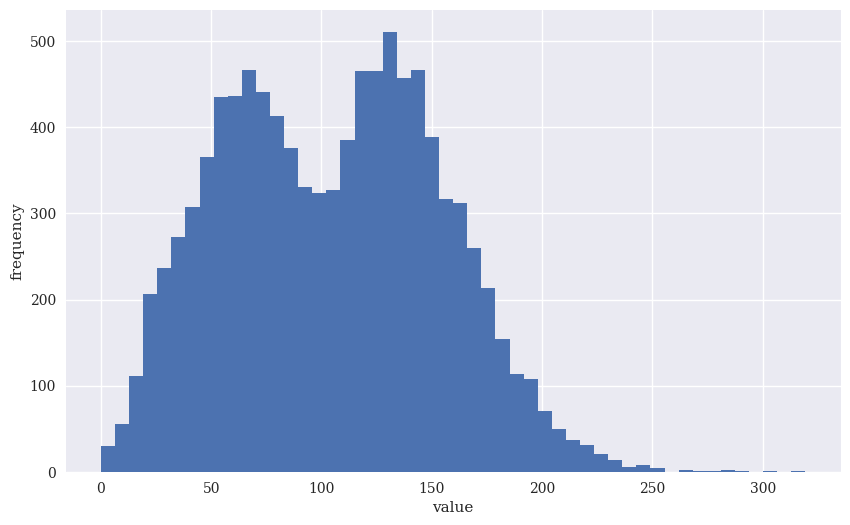

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

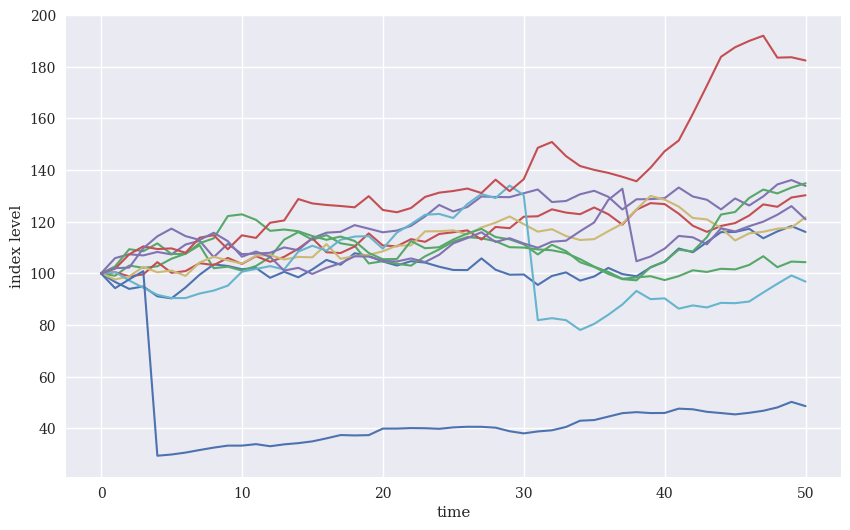

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');